Subsample factor: 20


1/1 [==============================] - 0s 64ms/step
Loss: 0.06805907189846039
Subsample factor: 10
1/1 [==============================] - 0s 57ms/step
Loss: 0.08441399037837982
Subsample factor: 5
1/1 [==============================] - 0s 51ms/step
Loss: 0.05894386023283005
Subsample factor: 2
1/1 [==============================] - 0s 55ms/step
Loss: 1.808294882721384e-07


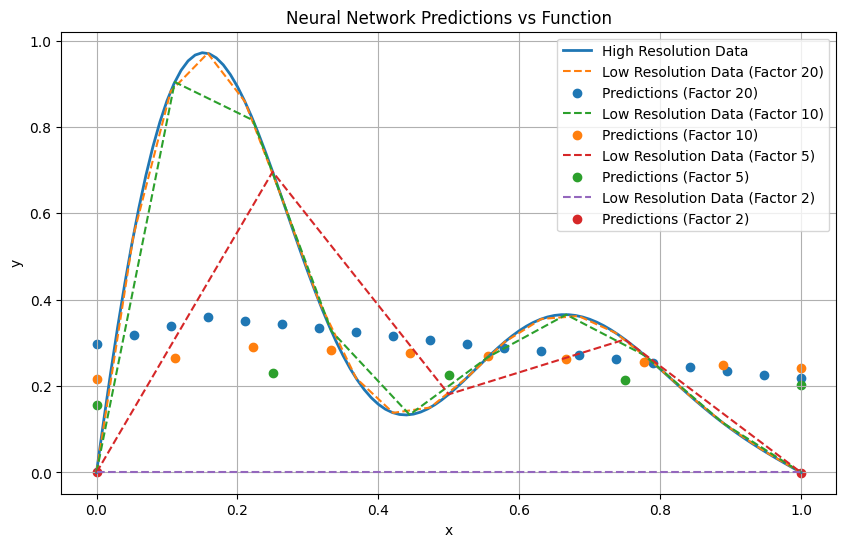

In [3]:
#Rusmia Sattar
#Generating high resolution data from low resolution data using tensor flow and keras

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

#Defining the given function

def f(x):
    return (1 - x) * np.sin(2 * x) + (1 - x)**2 * np.sin(10 * x)


# Generating the high-resolution dataset
X_high_res = np.linspace(0, 1, 101)
Y_high_res = f(X_high_res)

points = [20, 10, 5, 2]

#Setiing the plot for the high resolution data
plt.figure(figsize=(10,6))
plt.plot(X_high_res, Y_high_res, label='High Resolution Data', linewidth=2)


for i in points:
    print(f"Subsample factor: {i}")

# Generating low-resolution data using the original function with one subsampling factor
    x_low_res = np.linspace(0, 1, i)
    y_low_res = f(x_low_res)
# Reshaping X and y to match the length of x_low_res
    X = x_low_res.reshape(-1,1)
    y = y_low_res.reshape(-1,1)

    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(1,)),
        keras.layers.Dense(1, activation='linear')  # Output layer size is 1
    ])

    # Compiling the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Training the model
    hist = model.fit(X, y, epochs=100, verbose=0)  # Use X and y for training

    # Generating predictions
    y_pred = model.predict(X)

    # Plotting the results as needed
    print("Loss:", hist.history['loss'][-1])
    plt.plot(x_low_res, y_low_res, label=f'Low Resolution Data (Factor {i})', linestyle='dashed')
    plt.scatter(x_low_res, y_pred, marker='o', label=f'Predictions (Factor {i})')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Predictions vs Function')
plt.legend()
plt.grid(True)
plt.show()

